# Анализ поведения пользователей мобильного приложения для продажи продуктов питания (сборный проект №2)

**Описание и план проекта**
  
Мы работаем в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи нашего мобильного приложения.  
Изучим воронку продаж. Узнаем, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?  
После этого исследуем результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выясним, какой шрифт лучше.  
Создание двух групп A вместо одной имеет определённые преимущества. Если две контрольные группы окажутся равны, мы можем быть уверены в точности проведенного тестирования. Если же между значениями A и A будут существенные различия, это поможет обнаружить факторы, которые привели к искажению результатов. Сравнение контрольных групп также помогает понять, сколько времени и данных потребуется для дальнейших тестов.  
  
  
Шаг 1. Откроем файл с данными и изучим общую информацию  
Путь к файлу: /datasets/logs_exp.csv  
  
Шаг 2. Подготовим данные  
- Заменим названия столбцов на удобные для нас;  
- Проверим пропуски и типы данных. Откорректируем, если нужно;  
- Добавим столбец даты и времени, а также отдельный столбец дат;  
  
Шаг 3. Изучим и проверим данные  
- Сколько всего событий в логе?  
- Сколько всего пользователей в логе?
- Сколько в среднем событий приходится на пользователя?
Данными за какой период мы располагаем? Найдём максимальную и минимальную дату. Изучим, как меняется количество данных: построим столбчатую диаграмму, которая отобразит количество событий в зависимости от времени в разрезе групп. Можно ли быть уверенным, что у нас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определим, с какого момента данные полные и отбросим более старые. Данными за какой период времени мы располагаем на самом деле?
- Много ли событий и пользователей мы потеряли, отбросив старые данные?
- Проверим, что у нас есть пользователи из всех трёх экспериментальных групп.  

Шаг 4. Изучим воронку событий  
- Посмотрим, какие события есть в логах, как часто они встречаются. Отсортируем события по частоте.  
- Посчитаем, сколько пользователей совершали каждое из этих событий. Отсортируем события по числу пользователей. Посчитаем долю пользователей, которые хоть раз совершали событие.  
- Предположим, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.  
- По воронке событий посчитаем, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитаем отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.  
- На каком шаге теряем больше всего пользователей?  
- Какая доля пользователей доходит от первого события до оплаты?  

Шаг 5. Изучим результаты эксперимента  
- Сколько пользователей в каждой экспериментальной группе?  
- Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверим, находят ли статистические критерии разницу между выборками 246 и 247.  
- Выберем самое популярное событие. Посчитаем число пользователей, совершивших это событие в каждой из контрольных групп. Посчитаем долю пользователей, совершивших это событие. Проверим, будет ли отличие между группами статистически достоверным. Проделаем то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?  
- Аналогично поступим с группой с изменённым шрифтом. Сравним результаты с каждой из контрольных групп в отдельности по каждому событию. Сравним результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?  
- Какой уровень значимости мы выбрали при проверке статистических гипотез выше? Посчитаем, сколько проверок статистических гипотез мы сделали. При уровне значимости 0.1 в 10% случаев можно ошибочно отклонить нулевую гипотезу при условии, что она верна. Какой уровень значимости стоит применить? Если мы хотим изменить его, проделаем предыдущие пункты и проверим свои выводы.

## Изучение исходных данных

Сначала загрузим все необходимые библиотеки и отключим предупреждения

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

In [2]:
logs = pd.read_csv('/Users/dmitrynikolaev/Documents/datasets/logs_exp.csv', sep = '\t')
logs

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


Изучим исходные данные позже после подготовки

## Подготовка данных

### Заменим названия столбцов на удобные для нас

In [3]:
logs.columns=['event_name','user_id', 'event_datetime','group_id']
logs.columns

Index(['event_name', 'user_id', 'event_datetime', 'group_id'], dtype='object')

Заодно посмотрим уникальные значения в столбцах event_name и group_id и количество уникальных пользователей

In [4]:
print('Названия событий:', logs['event_name'].unique())
print('Группы:', logs['group_id'].unique())

Названия событий: ['MainScreenAppear' 'PaymentScreenSuccessful' 'CartScreenAppear'
 'OffersScreenAppear' 'Tutorial']
Группы: [246 248 247]


Имеем датафрейм из 4х столбцов:  
event_name — название события  
user_id — уникальный идентификатор пользователя  
event_datetime — время события  
group_id — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.  
  
Каждая запись в логе — это действие пользователя, или событие. Самих событий всего 5, группы 3.

### Проверим пропуски и типы данных. Откорректируем, если нужно

In [5]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_name      244126 non-null  object
 1   user_id         244126 non-null  int64 
 2   event_datetime  244126 non-null  int64 
 3   group_id        244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [6]:
logs.duplicated().sum()

413

В таблице 244126 записей, пропусков нет, но есть 413 дубликатов, удалим их.  
Столбцы с id имеют целочисленный тип, с именем - object, а вот с датой и временем - целочисленный, судя по всему в секундах, который надо поправить

In [7]:
logs = logs.drop_duplicates()
print('Дубликатов после удаления:',logs.duplicated().sum())

Дубликатов после удаления: 0


In [8]:
logs['event_datetime']=pd.to_datetime(logs['event_datetime'],unit = 's')

### Добавим столбец даты и времени, а также отдельный столбец дат

Столбец даты и времени сделали на предыдущем шаге из исходного, добавлять ещё один смысла нет

In [9]:
logs['event_date']=logs['event_datetime'].dt.date
logs.head()

,event_name,user_id,event_datetime,group_id,event_date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


**Вывод**  
На данным этапе мы загрузили, изучили и подготовили исходные данные:  
- посмотрели названия и типы столбцов (изменили их) и их содержание  
- проверили, что нет пропусков, нашли и удалили дубликаты  
- добавили отдельный столбец с датой

## Изучение и проверка данных

### Сколько всего событий в логе?

In [10]:
logs.shape

(243713, 5)

После удаления дубликатов у нас в логе осталось 243713 событий, сами события (количество и названия) мы посмотрели раньше

### Сколько всего пользователей в логе?

In [11]:
print('Количество пользователей:', logs['user_id'].nunique())

Количество пользователей: 7551


### Сколько в среднем событий приходится на пользователя? Данными за какой период мы располагаем?
**Найдём максимальную и минимальную дату. Изучим, как меняется количество данных: построим столбчатую диаграмму, которая отобразит количество событий в зависимости от времени в разрезе групп. Можно ли быть уверенным, что у нас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определим, с какого момента данные полные и отбросим более старые. Данными за какой период времени мы располагаем на самом деле?**

In [12]:
print('Среднее количество событий на пользователя - %d' % (len(logs)/logs['user_id'].nunique()))

Среднее количество событий на пользователя - 32


In [13]:
print('Мы располагаем данными на период:', min(logs['event_date']), max(logs['event_date']))

Мы располагаем данными на период: 2019-07-25 2019-08-07


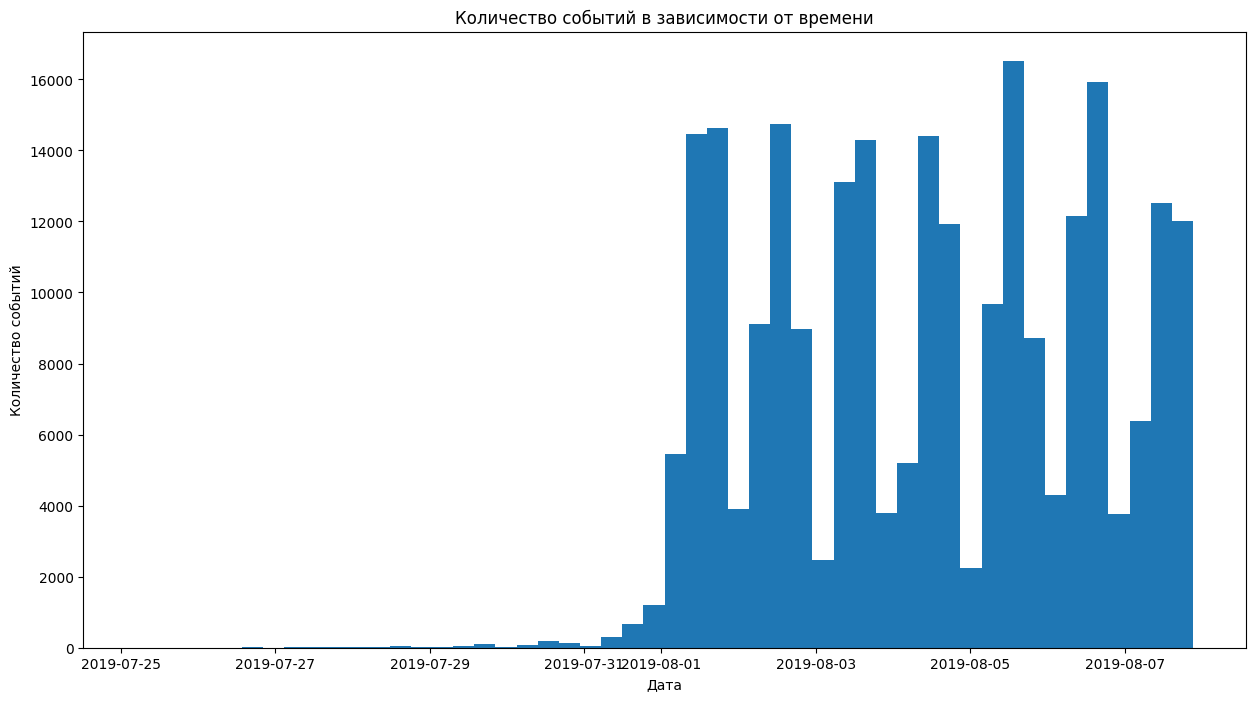

In [14]:
plt.figure(figsize=(15,8))

plt.hist(logs['event_datetime'],bins=50)

plt.title('Количество событий в зависимости от времени')
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.show()

Видим, что данных за июль у нас почти и нет, удалим их, оставим только за август - с 1ого по 7ое

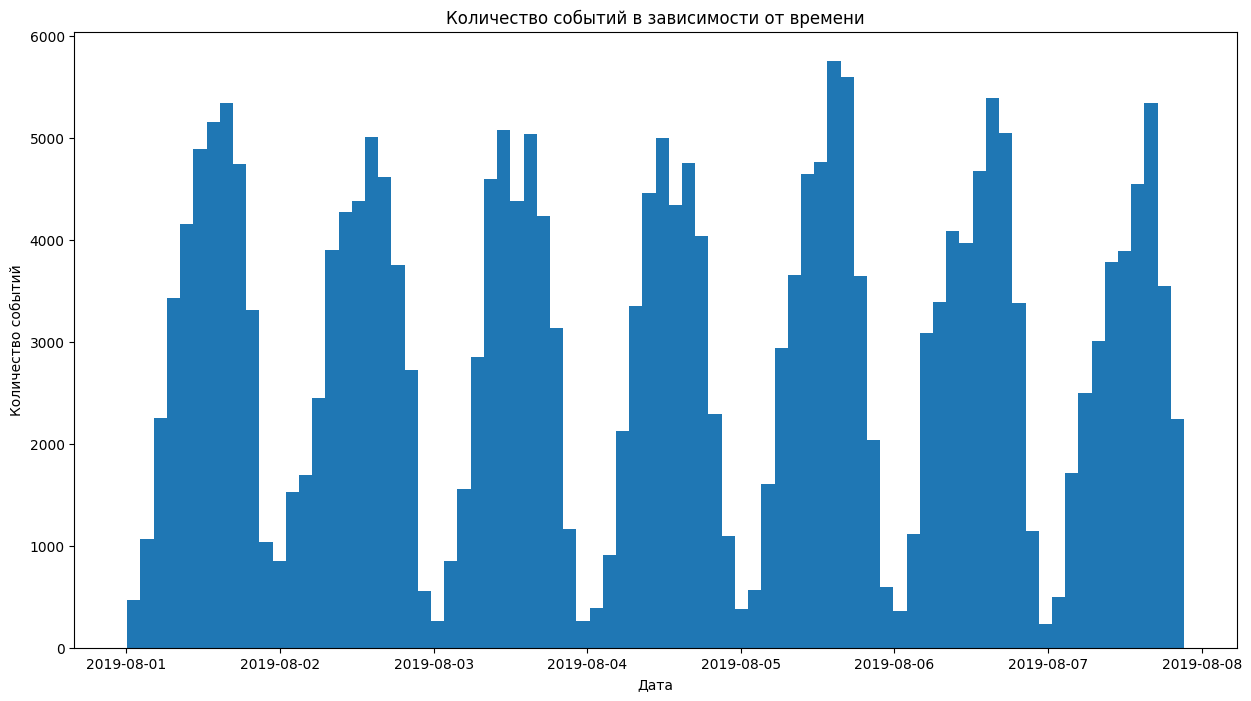

In [15]:
#сохраним количество событий и пользователей до удаления
full_logs=logs.shape[0]
full_users=logs['user_id'].nunique()


logs = logs.query('event_datetime>="2019-08-01"')

plt.figure(figsize=(15,8))

plt.hist(logs['event_datetime'],bins=80)

plt.title('Количество событий в зависимости от времени')
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.show()

Теперь видим данные только за август - с 1ого по 7ое. Можно отметить, что по дням количество логов распределено примерно одинаково и есть закономерность, что днём их больше, ночью меньше.

### Много ли событий и пользователей мы потеряли, отбросив старые данные?

In [16]:
print('После корректировки дат у нас осталось:')
print('Количество событий:', logs.shape[0])
print('Количество пользователей:', logs['user_id'].nunique())
print()
print('Потеряли:')
print('Событий:', full_logs-logs.shape[0], 'или {:.1%}'.format((full_logs-logs.shape[0])/full_logs))
print('Пользователей:', full_users-logs['user_id'].nunique(), \
          'или {:.1%}'.format((full_users-logs['user_id'].nunique())/full_users))

После корректировки дат у нас осталось:
Количество событий: 240887
Количество пользователей: 7534

Потеряли:
Событий: 2826 или 1.2%
Пользователей: 17 или 0.2%


Потеряли очень маленькую часть данных

### Проверим, что у нас есть пользователи из всех трёх экспериментальных групп

In [17]:
logs.groupby('group_id').agg({'user_id':'nunique'})

,user_id
group_id,
246,2484
247,2513
248,2537


In [18]:
logs.groupby('group_id').agg({'user_id':'count'})

,user_id
group_id,
246,79302
247,77022
248,84563


Пользователи есть во всех трёх группах и распределены равномерно, по 2.5 тысячи.  
А вот количество событий в экспериментальной группе больше, чем в контрольных

**Вывод**  
Мы проверили данные и поняли, что имеем события за июль с 25ого и август до 7ого 2019ого года, при этом увидели данных за июль очень мало и решили удалить их. Потеряли при этом всего 2826 из 243713, то есть 1.2%, и 17 пользователей из 7551 или 0.2%. Также посчитали среднее количество событий на пользователя - 32, и проверили распределение пользователей и событий по группам: пользователей примерно равное количество, событий в экспериментальной группе больше.

## Изучение воронки событий

### Посмотрим, какие события есть в логах, как часто они встречаются. Отсортируем события по частоте.

In [19]:
logs['event_name'].value_counts()

event_name
MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: count, dtype: int64

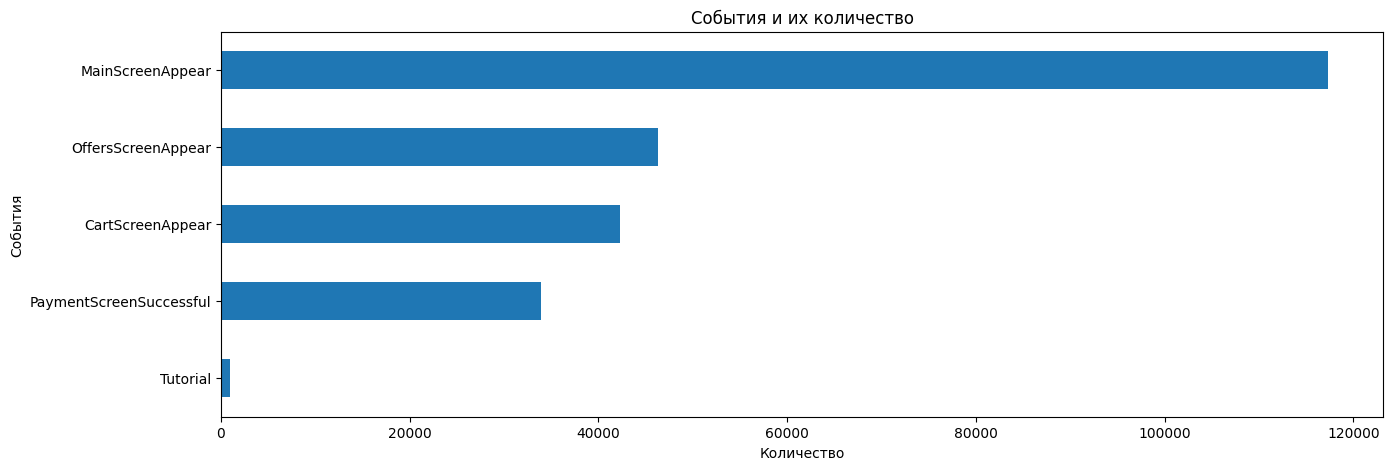

In [20]:
plt.figure(figsize=(15,5))
logs['event_name'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('События и их количество')
plt.xlabel('Количество')
plt.ylabel('События')
plt.show()

Вывели все имеющиеся события и их количество: больше всего это просмотр главной страницы - 117328, затем экран предложения - 46333, затем корзина - 42303 и упешная оплата - 33918. На странице руководства всего 1005 событий.

### Посчитаем, сколько пользователей совершали каждое из этих событий. Отсортируем события по числу пользователей. Посчитаем долю пользователей, которые хоть раз совершали событие.

In [21]:
funnel=(logs
    .groupby(by='event_name')
    .agg({'user_id':'nunique'})
    .reset_index()
    .rename(columns={'user_id':'count_users'})
    .sort_values(by='count_users',ascending=False)
    .reset_index(drop=True))
funnel['percent']=round(funnel['count_users']/logs['user_id'].nunique()*100,1)
funnel

,event_name,count_users,percent
0,MainScreenAppear,7419,98.5
1,OffersScreenAppear,4593,61.0
2,CartScreenAppear,3734,49.6
3,PaymentScreenSuccessful,3539,47.0
4,Tutorial,840,11.1


Главную страницу увидели почти все, экран предложения 61%, перешли в корзину - 49.6% и упешно оплатили - 47%. На странице руководства было всего 11.1% пользователей.

### Предположим, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.

Видим, что первые 4 по количеству пользователей события выстраиваются в цепочку (главная страница - предложение - корзина - оплата), а вот страницу руководства пропускают почти все, наверное потому, что процесс покупки и так понятен, в нём можно разобраться и без этой страницы. Да и не обязательно, что, посмотрев эту страницу, пользователь продолжил пользоваться приложением. Далее не будем учитывать её в воронке

In [22]:
funnel=funnel[funnel['event_name']!='Tutorial']
funnel

,event_name,count_users,percent
0,MainScreenAppear,7419,98.5
1,OffersScreenAppear,4593,61.0
2,CartScreenAppear,3734,49.6
3,PaymentScreenSuccessful,3539,47.0


### По воронке событий посчитаем, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем).  
**То есть для последовательности событий A → B → C посчитаем отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.**

In [23]:
funnel['steps_percent']=round((funnel['count_users']/funnel['count_users'].shift()*100),1)
funnel.fillna(100)

,event_name,count_users,percent,steps_percent
0,MainScreenAppear,7419,98.5,100.0
1,OffersScreenAppear,4593,61.0,61.9
2,CartScreenAppear,3734,49.6,81.3
3,PaymentScreenSuccessful,3539,47.0,94.8


### На каком шаге теряем больше всего пользователей?

Больше всего пользователей теряем на первом же шаге после просмотра главной страницы - 38.1%. В корзину с предыдущего шага переходят 81% пользователей, оплачивают 95% от сформировавших корзину.

### Какая доля пользователей доходит от первого события до оплаты?

In [24]:
round((funnel[funnel['event_name']=='PaymentScreenSuccessful']['count_users']/funnel['count_users'].shift(3)*100),1)

0     NaN
1     NaN
2     NaN
3    47.7
Name: count_users, dtype: float64

Только 47% пользователей доходят с первого шага до оплаты

**Вывод**  
Посчитали для всех имеющихся событий их количество: больше всего это просмотр главной страницы - 117328, затем экран предложения - 46333, затем корзина - 42303 и упешная оплата - 33918. На странице руководства всего 1005 событий.  
В пересчёте на пользователей - главную страницу увидели почти все - 98.5%, экран предложения - 61%, перешли в корзину - 49.6% и упешно оплатили - 47%. На странице руководства было всего 11.1% пользователей.  
Первые 4 по количеству пользователей события выстраиваются в цепочку (главная страница - предложение - корзина - оплата), страницу руководства пропускают, поэтому её мы не учитываем в воронке.  
Больше всего пользователей теряем на первом же шаге после просмотра главной страницы - 38.1%. В корзину с предыдущего шага переходят 81% пользователей, оплачивают 95% от сформировавших корзину.  
И также посчитали, что лишь 47% пользователей доходят с главного экрана приложения до оплаты.

## Изучение результатов эксперимента

### Сколько пользователей в каждой экспериментальной группе?

На шаге 3.5 мы уже проверяли распределение пользователей по группам, выведем ещё раз и запишем в таблицу и посчитаем пользователей в общей А группе

In [25]:
users_groups = logs.groupby('group_id')['user_id'].nunique()
users_groups['Asum']=users_groups[246]+users_groups[247]
users_groups

group_id
246     2484
247     2513
248     2537
Asum    4997
Name: user_id, dtype: int64

В контрольных группах по 2484 и 2513 пользователей, всего - 4997, в экспериментальной 2537

### Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверим, находят ли статистические критерии разницу между выборками 246 и 247.

(по сути это заголовок с следующему подшагу)

### Выберем самое популярное событие. Посчитаем число пользователей, совершивших это событие в каждой из контрольных групп. Посчитаем долю пользователей, совершивших это событие. Проверим, будет ли отличие между группами статистически достоверным. Проделаем то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?

Проверим, не попали ли какие-нибудь пользователи сразу в несколько групп

In [26]:
len(logs.groupby('user_id')['group_id'].nunique().reset_index().query('group_id > 1'))

0

Задублированных пользователей нет.  
Разделим пользователей по группам и событиям, исключив Tutorial, и отсортируем по воронке. Сделаем сразу объединённую контрольную группу

In [27]:
users_events = logs[logs['event_name']!='Tutorial']
users_events = users_events.pivot_table(index='event_name', values='user_id', columns='group_id', aggfunc='nunique') \
                .reset_index().sort_values(by=246, ascending=False).reset_index(drop=True)
users_events['Asum']=users_events[246]+users_events[247]
users_events

group_id,event_name,246,247,248,Asum
0,MainScreenAppear,2450,2476,2493,4926
1,OffersScreenAppear,1542,1520,1531,3062
2,CartScreenAppear,1266,1238,1230,2504
3,PaymentScreenSuccessful,1200,1158,1181,2358


Посчитаем долю пользователей, совершивших каждое событие. Сделаем это в новой таблице

In [28]:
users_events_part=pd.DataFrame(users_events['event_name'])
users_events_part[246] = (users_events[246]/users_groups[246]*100).round(1)
users_events_part[247] = (users_events[247]/users_groups[247]*100).round(1)
users_events_part[248] = (users_events[248]/users_groups[248]*100).round(1)
users_events_part['Asum'] = (users_events['Asum']/users_groups['Asum']*100).round(1)
users_events_part

,event_name,246,247,248,Asum
0,MainScreenAppear,98.6,98.5,98.3,98.6
1,OffersScreenAppear,62.1,60.5,60.3,61.3
2,CartScreenAppear,51.0,49.3,48.5,50.1
3,PaymentScreenSuccessful,48.3,46.1,46.6,47.2


Чтобы проверить корректность теста и расчётов у нас есть две контрольные А группы (246 и 247).  
Для проверки статистически значимой разницы между ними используем двусторонний Z-тест:  
    - нулевая гипотеза - доля уникальных пользователей на этапе воронки одинакова,  
    - альтернативная гипотеза - доля уникальных пользователей на этапе воронки отличается.  

Напишем для этого функцию, у которой на входе будут наши группы и уровень статистической значимости, а на выходе p-value

In [29]:
def my_ztest(group1,group2,alpha):
    print('Проверяем группы', group1, 'и', group2, 'при уровне значимости', alpha) #выведем исходные данные
    
    for i in users_events.index:  # для каждого события
        p1 = users_events[group1][i]/users_groups[group1] # считаем пропорции успеха в каждой группе и в сумме
        p2 = users_events[group2][i]/users_groups[group2] 
        p_sum = (users_events[group1][i]+users_events[group2][i])/(users_groups[group1]+users_groups[group2])
        
        diff = p1-p2 # разница пропорций
        # считаем статистику в стандартных отклонениях нормального распределения и задаём его
        z_value = diff/math.sqrt(p_sum*(1-p_sum)*(1/users_groups[group1]+1/users_groups[group2])) 
        distr = st.norm(0,1)
        
        # считаем p-value и выводим результаты
        p_value = ((1-distr.cdf(abs(z_value)))*2).round(2)
        print()
        print('Для события', users_events['event_name'][i], 'p-value =', p_value)
        if (p_value<alpha):
            print('Отвергаем нулевую гипотезу, разница между долями есть')
        else: print ('Не получилось отвергнуть нулевую гипотезу, разницы между долями нет')
        print('--------')

Далее с помощью этой функции проверим статистическую значимость для контрольных А групп (246 и 247) с уровнем 0.01, необходимым для А/А теста

In [30]:
my_ztest(246,247,0.01)

Проверяем группы 246 и 247 при уровне значимости 0.01

Для события MainScreenAppear p-value = 0.76
Не получилось отвергнуть нулевую гипотезу, разницы между долями нет
--------

Для события OffersScreenAppear p-value = 0.25
Не получилось отвергнуть нулевую гипотезу, разницы между долями нет
--------

Для события CartScreenAppear p-value = 0.23
Не получилось отвергнуть нулевую гипотезу, разницы между долями нет
--------

Для события PaymentScreenSuccessful p-value = 0.11
Не получилось отвергнуть нулевую гипотезу, разницы между долями нет
--------


Получили, что значимой разницы между контрольными группами нет, значит разбиение работает корректно.  
Учитывая, что мы провели 4 теста, поправкой Бонферрони на множественность уровень статистической значимости следовало снизить в 4 раза до 0,0025, что не повлияло бы на результат, так как минимальное p-value 0.11, что и так больше.

### Аналогично поступим с группой с изменённым шрифтом. Сравним результаты с каждой из контрольных групп в отдельности по каждому событию. Сравним результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?

In [31]:
my_ztest(246,248,0.05) #группы А1 и В

Проверяем группы 246 и 248 при уровне значимости 0.05

Для события MainScreenAppear p-value = 0.29
Не получилось отвергнуть нулевую гипотезу, разницы между долями нет
--------

Для события OffersScreenAppear p-value = 0.21
Не получилось отвергнуть нулевую гипотезу, разницы между долями нет
--------

Для события CartScreenAppear p-value = 0.08
Не получилось отвергнуть нулевую гипотезу, разницы между долями нет
--------

Для события PaymentScreenSuccessful p-value = 0.21
Не получилось отвергнуть нулевую гипотезу, разницы между долями нет
--------


In [32]:
my_ztest(247,248,0.05) #группы А2 и В

Проверяем группы 247 и 248 при уровне значимости 0.05

Для события MainScreenAppear p-value = 0.46
Не получилось отвергнуть нулевую гипотезу, разницы между долями нет
--------

Для события OffersScreenAppear p-value = 0.92
Не получилось отвергнуть нулевую гипотезу, разницы между долями нет
--------

Для события CartScreenAppear p-value = 0.58
Не получилось отвергнуть нулевую гипотезу, разницы между долями нет
--------

Для события PaymentScreenSuccessful p-value = 0.74
Не получилось отвергнуть нулевую гипотезу, разницы между долями нет
--------


In [33]:
my_ztest('Asum',248,0.05) #группы объединённая А и В

Проверяем группы Asum и 248 при уровне значимости 0.05

Для события MainScreenAppear p-value = 0.29
Не получилось отвергнуть нулевую гипотезу, разницы между долями нет
--------

Для события OffersScreenAppear p-value = 0.43
Не получилось отвергнуть нулевую гипотезу, разницы между долями нет
--------

Для события CartScreenAppear p-value = 0.18
Не получилось отвергнуть нулевую гипотезу, разницы между долями нет
--------

Для события PaymentScreenSuccessful p-value = 0.6
Не получилось отвергнуть нулевую гипотезу, разницы между долями нет
--------


Минимальное p-value, которое мы получили, 0.08, поэтому нулевую гипотезу не отвергаем ни в одном случае/событии, то есть считаем, что разницы между группами нет, как между обеими контрольными и экспериментальной, так и в сравнении с объединённой.  
Аналогично А/А тесту поправкой Бонферрони уровень статистической значимости следовало снизить в 12 раз (3 сравнения групп по 4м событиям = 12 тестов) до 0,004, что так же не повлияло бы на результат, так как минимальное p-value  больше.

### Какой уровень значимости мы выбрали при проверке статистических гипотез выше? Посчитаем, сколько проверок статистических гипотез мы сделали. При уровне значимости 0.1 в 10% случаев можно ошибочно отклонить нулевую гипотезу при условии, что она верна. Какой уровень значимости стоит применить? Если мы хотим изменить его, проделаем предыдущие пункты и проверим свои выводы.

Выше мы выбрали уровень значимости 0.05. При этом сделали 4 проверки гипотез в А/А тесте, и 12 в А/В.  
При уровне значимости 0.1 мы бы получили аналогичные результаты, ни в одном тесте не отвергнув нулевую гипотезу, поскольку минимальное p-value, которое мы получили 0.08, поэтому изменять его не будем.

## Общий вывод

В результате исследования мы изучили поведение пользователей нашего мобильного приложения на основе собранных логов.  
Сначала загрузили и **изучили исходные данные, подготовили их** - заменили названия столбцов, посмотрели названия событий и групп, проверили отсутствие пропусков, удалили дубликаты и привели типы данных в необходимые нам, добавили отдельный столбец с датами.  
В логе у нас 243713 событий и 7551 пользователь, в среднем 32 события на пользователя.  
Данными мы располагаем за период от 25 июля до 7 августа 2019ого года, при этом за июль логов почти нет, поэтому мы удалили их, оставив в итоге 240887 событий и 7534 пользователей.  
Проверили распределение пользователей по группам: А1 - 2484, А2 - 2513 и В - 2537.  
  
**Затем изучили воронку событий.**  
Посмотрели все имеющиеся события и их количество: 
- просмотр главной страницы - 117328  
- экран предложения - 46333
- корзина - 42303 
- упешная оплата - 33918.  
- на странице руководства всего 1005 событий.  
  
Главную страницу увидели почти все, экран предложения 61%, перешли в корзину - 49.6% и упешно оплатили - 47%. На странице руководства было всего 11.1% пользователей. Далее последнюю страницу мы исключили из воронки.  
Поняли, что больше всего пользователей теряем на первом шаге после просмотра главной страницы - 38.1%. В корзину с предыдущего шага переходят 81% пользователей, оплачивают 95% от сформировавших корзину.  
  
Затем мы ещё раз посмотрели на количество пользователей в группе и сделали объединённую, проверили, что все попали только в одну группу, и перешли к самим А/А/В тестам.  
**В ходе А/А тестов** сравнили две контрольные группы с уровнем статистической значимости 0.01. Получили, что значимой разницы между контрольными группами нет, значит разбиение работает корректно.  
Аналогично сравнили контрольные группы (а так же объединённую) с экспериментальной - **А/В тесты**, проведя 12 тестов. Минимальное p-value, которое мы получили, 0.08, поэтому нулевую гипотезу не отвергли ни в одном случае/событии, то есть считаем, что разницы между группами нет.  
После А/В теста посчитали, что снижение уровня статистической значимости до 0.01 не имеет смысла, так как это не повлияет на результат.  
  
**То есть в итоге получили, что изменение шрифтов в приложении на поведение пользователей не повлияло.**

По результатам данных тестов можем дать **рекомендации** менеджерам и дизайнерам не тратить ресурсы на такие незначительные изменение типа шрифтов, потому что видим, что они не влияют на пользователей, а обратить внимание например на главную страницу в целом, чтобы она и всё, что на ней находится, больше привлекали внимание пользователей, поскольку именно на данном этапе много людей перестают пользоваться приложением. Возможно она неудобна и стоит пересмотреть её, возможно стоит пересмотреть её дизайн и сделать какие-то яркие акценты, привлекающие внимание пользователей к товарам.